<a href="https://colab.research.google.com/github/noual/iasd/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass Classification

You’ll work with the Reuters dataset, a set of short newswires and
their topics, published by Reuters in 1986. It’s a simple, widely used
toy dataset for text classification. There are 46 different topics; some
topics are more represented than others, but each topic has at least
10 examples in the training set.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
num_classes = 46

In [3]:
print(f'Training data shape : {train_data.shape}')
print(f'Training labels shape : {train_labels.shape}')

Training data shape : (8982,)
Training labels shape : (8982,)


## Encode the data

We use one-hot encoding

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Define the network

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Define a validation set

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

## Choose a loss function and optimizer

In [34]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [35]:
model.compile(optimizer='Adam', loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])

In [36]:
history = model.fit(x=x_train, y=y_train, batch_size=4, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1437/1437 [==============================] - 5s 3ms/step - loss: 1.3694 - categorical_accuracy: 0.6860 - val_loss: 0.9649 - val_categorical_accuracy: 0.7766
Epoch 2/10
1437/1437 [==============================] - 4s 3ms/step - loss: 0.5768 - categorical_accuracy: 0.8606 - val_loss: 0.9247 - val_categorical_accuracy: 0.8058
Epoch 3/10
1437/1437 [==============================] - 4s 3ms/step - loss: 0.2869 - categorical_accuracy: 0.9334 - val_loss: 0.9649 - val_categorical_accuracy: 0.7982
Epoch 4/10
1437/1437 [==============================] - 5s 3ms/step - loss: 0.1838 - categorical_accuracy: 0.9560 - val_loss: 1.1583 - val_categorical_accuracy: 0.7871
Epoch 5/10
1437/1437 [==============================] - 4s 3ms/step - loss: 0.1495 - categorical_accuracy: 0.9614 - val_loss: 1.1990 - val_categorical_accuracy: 0.7857
Epoch 6/10
1437/1437 [==============================] - 5s 3ms/step - loss: 0.1233 - categorical_accuracy: 0.9633 - val_loss: 1.2550 - val_categorical_accuracy:

In [25]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


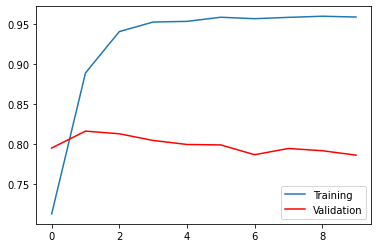

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'], label='Training')
plt.plot(history.history['val_categorical_accuracy'], 'r', label='Validation')
plt.legend()

In [32]:
model.evaluate(x=x_test, y=y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.5943 - categorical_accuracy: 0.7841


[1.594305157661438, 0.784060537815094]